In [36]:
import pandas as pa
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import svm

In [15]:
cols = ['FEBRE','TOSSE','GARGANTA','DISPNEIA','DESC_RESP','SATURACAO','DIARREIA','VOMITO','CS_SEXO','PUERPERA','CARDIOPATI',
       'HEMATOLOGI','SIND_DOWN','HEPATICA','ASMA','DIABETES','NEUROLOGIC','PNEUMOPATI','IMUNODEPRE','RENAL','OBESIDADE','CLASSI_FIN','TP_IDADE']

#cols = [item.lower() for item in cols]

df = pa.read_csv('gripe_2019.csv', engine='python',sep=';',usecols=cols).loc[0:2000]

In [23]:
df['PUERPERA'].fillna(value=2, inplace=True)
df['DIARREIA'].fillna(value=2, inplace=True)
df['DIABETES'].fillna(value=2, inplace=True)
df['PNEUMOPATI'].fillna(value=2, inplace=True)
df['CS_SEXO'].replace({"M": 0, "F": 1, "I":-1}, inplace=True)
df['OBESIDADE'].fillna(value=2, inplace=True)
df['NEUROLOGIC'].fillna(value=2, inplace=True)
df['ASMA'].fillna(value=2, inplace=True)
df['HEPATICA'].fillna(value=2, inplace=True)
df['SATURACAO'].fillna(value=2, inplace=True)
df['CARDIOPATI'].fillna(value=2, inplace=True)
df['FEBRE'].fillna(value=2, inplace=True)
df['IMUNODEPRE'].fillna(value=2, inplace=True)
df['RENAL'].fillna(value=2, inplace=True)
df['DISPNEIA'].fillna(value=2, inplace=True)
df['DESC_RESP'].fillna(value=2, inplace=True)
df['SIND_DOWN'].fillna(value=2, inplace=True)
df['HEMATOLOGI'].fillna(value=2, inplace=True)
df['TOSSE'].fillna(value=2, inplace=True)
df['GARGANTA'].fillna(value=2, inplace=True)
df['VOMITO'].fillna(value=2, inplace=True)
df['CLASSI_FIN'].fillna(value=0, inplace=True)


pa.to_numeric(df['CS_SEXO'])

df

,CS_SEXO,TP_IDADE,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESC_RESP,SATURACAO,DIARREIA,VOMITO,...,SIND_DOWN,HEPATICA,ASMA,DIABETES,NEUROLOGIC,PNEUMOPATI,IMUNODEPRE,RENAL,OBESIDADE,CLASSI_FIN
0,0,3,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,4.0
1,1,2,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,4.0
2,0,3,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,4.0
3,1,2,1.0,1.0,9.0,1.0,1.0,1.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
4,1,2,1.0,2.0,2.0,1.0,1.0,1.0,9.0,9.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996,1,2,1.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,4.0
1997,1,3,1.0,1.0,2.0,1.0,1.0,1.0,9.0,9.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,4.0
1998,0,3,1.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0
1999,0,2,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0


In [24]:
#df.isnull().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2001 entries, 0 to 2000
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CS_SEXO     2001 non-null   int64  
 1   TP_IDADE    2001 non-null   int64  
 2   FEBRE       2001 non-null   float64
 3   TOSSE       2001 non-null   float64
 4   GARGANTA    2001 non-null   float64
 5   DISPNEIA    2001 non-null   float64
 6   DESC_RESP   2001 non-null   float64
 7   SATURACAO   2001 non-null   float64
 8   DIARREIA    2001 non-null   float64
 9   VOMITO      2001 non-null   float64
 10  PUERPERA    2001 non-null   float64
 11  CARDIOPATI  2001 non-null   float64
 12  HEMATOLOGI  2001 non-null   float64
 13  SIND_DOWN   2001 non-null   float64
 14  HEPATICA    2001 non-null   float64
 15  ASMA        2001 non-null   float64
 16  DIABETES    2001 non-null   float64
 17  NEUROLOGIC  2001 non-null   float64
 18  PNEUMOPATI  2001 non-null   float64
 19  IMUNODEPRE  2001 non-null  

In [21]:
kmeans = KMeans(n_clusters=3, random_state=0)

In [25]:
y_teste = kmeans.fit(df)
y_teste.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [26]:
df['Kclasses']=y_teste.labels_.tolist()

In [108]:
df['Kclasses']

0      1
1      1
2      0
3      0
4      1
      ..
196    0
197    0
198    0
199    0
200    0
Name: Kclasses, Length: 201, dtype: int64

In [28]:
correlation = df.corr()
correlation

,CS_SEXO,TP_IDADE,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESC_RESP,SATURACAO,DIARREIA,VOMITO,...,HEPATICA,ASMA,DIABETES,NEUROLOGIC,PNEUMOPATI,IMUNODEPRE,RENAL,OBESIDADE,CLASSI_FIN,Kclasses
CS_SEXO,1.000000,0.077021,0.063475,-0.008468,-0.059499,0.013715,-0.016772,-0.000610,0.000261,-0.017267,...,0.025314,0.069607,-0.009504,0.025962,-0.018889,-0.009157,0.024982,-0.004602,0.004644,-0.063940
TP_IDADE,0.077021,1.000000,0.057435,0.052829,-0.175103,0.031905,0.043135,-0.015951,0.025581,0.029284,...,0.016824,-0.013337,-0.066806,-0.006338,-0.025371,-0.038118,0.007294,-0.007121,0.128147,-0.131288
FEBRE,0.063475,0.057435,1.000000,0.045578,0.066737,0.045295,0.010476,-0.041114,0.064248,0.061026,...,0.236526,0.037284,-0.049892,0.206064,-0.070911,-0.014035,-0.020734,0.004202,0.061789,0.049030
TOSSE,-0.008468,0.052829,0.045578,1.000000,0.086162,0.012320,0.008248,-0.038251,0.125856,0.122156,...,-0.004092,-0.004967,-0.015579,-0.008903,-0.001313,-0.011120,-0.007928,0.009102,0.043532,0.050919
GARGANTA,-0.059499,-0.175103,0.066737,0.086162,1.000000,-0.077565,0.022403,0.055202,0.162247,0.135951,...,0.025113,-0.004681,0.044346,0.048158,-0.003737,0.065587,0.016776,0.021706,-0.005113,0.896716
DISPNEIA,0.013715,0.031905,0.045295,0.012320,-0.077565,1.000000,0.047192,0.006495,0.062728,0.011996,...,-0.010463,-0.020073,-0.031622,-0.010664,0.003940,-0.011205,-0.004453,-0.009904,-0.063287,-0.063930
DESC_RESP,-0.016772,0.043135,0.010476,0.008248,0.022403,0.047192,1.000000,0.193207,0.171443,0.167550,...,-0.007431,-0.003993,-0.000044,-0.012084,-0.031669,0.001796,-0.005572,-0.013163,0.022145,0.054377
SATURACAO,-0.000610,-0.015951,-0.041114,-0.038251,0.055202,0.006495,0.193207,1.000000,0.100847,0.090133,...,-0.014233,-0.003011,-0.035602,-0.000552,-0.020724,-0.003631,0.006366,0.003590,0.028112,0.096917
DIARREIA,0.000261,0.025581,0.064248,0.125856,0.162247,0.062728,0.171443,0.100847,1.000000,0.842121,...,-0.002363,0.098224,0.054008,0.029059,-0.017696,-0.013320,0.069674,-0.014600,0.021698,0.345819
VOMITO,-0.017267,0.029284,0.061026,0.122156,0.135951,0.011996,0.167550,0.090133,0.842121,1.000000,...,-0.001859,0.089611,0.056470,0.025116,0.007668,-0.026970,0.020469,-0.013070,0.032883,0.341761


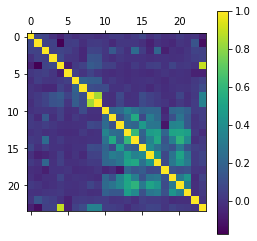

In [29]:
correlation_frame = df.corr(method='pearson')
plt.matshow(correlation_frame)
plt.colorbar()
plt.show()

AttributeError: type object 'ConfusionMatrixDisplay' has no attribute 'from_estimator'